<a href="https://colab.research.google.com/github/JJYL94/Linear-Regressions/blob/main/Analysis_of_Electric_Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Electric Car Dataset**

## Analysis Approach
---
Problem Statement: Which combination of variables affect the price of an electric vehicle the most?

* Note that the original Problem Statement stated "Apart from Segment", however I have decided to include this variable in the analysis for completeness

Phases:
1. Exploratory Data Analysis
2. Data Visualisation and Correlation Mapping
3. Linear Regression Modelling

The desired outcome of this approach is to communicate key insights about the Electric Cars dataset to my non-technical audience in a concise and easy to understand manner. A couple of variables which represent the biggest drivers of price should be uncovered through this analysis.


# Python Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.3f}'.format

# Read and Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Electric_cars = pd.read_csv("/content/drive/MyDrive/420047 - Python/Assessment Task 2/ElectricCarDataset.csv")
Electric_cars = pd.DataFrame(Electric_cars) # convert to dataframe
Electric_cars.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.600,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.000,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.700,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.800,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.500,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
Electric_cars.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.500,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.500,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.900,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.100,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.500,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [ ]:
Electric_cars.shape 

(103, 14)

103 observations (rows) and 14 attributes (columns) are present in the imported dataset

In [ ]:
Electric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_KM         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


All rows under attributes appear to be filled.

# Checking for Null Values

In [ ]:
Electric_cars.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_KM           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

# Checking for Missing Values/Dashes

In [ ]:
PriceEuro_missing = Electric_cars['PriceEuro'].isna() # Check for missing values in key attribute: PriceEuro
Electric_cars.loc[PriceEuro_missing,:]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro


No missing values in our key attribute/dependent variable: PriceEuro

While there appears to be no missing values in the overall dataset, I have noticed a few hyphens/dashes ('-') in the FastCharge_KmH column from initial perusal:







In [ ]:
Electric_cars.loc[Electric_cars['FastCharge_KmH'] == '-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.600,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.400,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.700,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.600,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.900,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565


I have made the difficult decision to drop these hyphenated rows as I don't want to leave them blank nor convert them to 0 - full data rows are preferred. I also need to convert FastCharge_KmH from an 'object' type to a 'int64' numeric type.

In [ ]:
Electric_cars.drop(Electric_cars[Electric_cars['FastCharge_KmH'] == '-'].index, inplace = True)

In [ ]:
Electric_cars.shape

(98, 14)

In [ ]:
# Adding try-except block in case conversion to numeric fails
try:
    Electric_cars['FastCharge_KmH'] = pd.to_numeric(Electric_cars['FastCharge_KmH'])
except Exception as e:
    print("Something needs fixing: {}".format(e))

In [ ]:
Electric_cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_KM         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     int64  
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     object 
 9   PlugType         98 non-null     object 
 10  BodyStyle        98 non-null     object 
 11  Segment          98 non-null     object 
 12  Seats            98 non-null     int64  
 13  PriceEuro        98 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.5+ KB


Although I would have preferred not to remove 5 rows of data, 98 observations of data for the 14 attributes should suffice for further analysis.

# Checking Duplicate Values

In [ ]:
Electric_cars.duplicated() # checking for duplicates, returning a boolean value

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Length: 98, dtype: bool

In [ ]:
Duplicate_rows = Electric_cars[Electric_cars.duplicated()]
print("Number of duplicate rows: {}".format(Duplicate_rows.shape))

Number of duplicate rows: (0, 14)


No duplicate rows detected in the dataset

# Descriptive Statistics of Attributes

In [ ]:
Electric_cars.info() # Checking data type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_KM         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     int64  
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     object 
 9   PlugType         98 non-null     object 
 10  BodyStyle        98 non-null     object 
 11  Segment          98 non-null     object 
 12  Seats            98 non-null     int64  
 13  PriceEuro        98 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.5+ KB


In [ ]:
include = ['object', 'float64', 'int64']
Electric_cars.describe(include = include) # output basic descriptive stats of each column

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,98,98,98.000,98.000,98.000,98.000,98.000,98,98,98,98,98,98.000,98.000
unique,32,97,NaN,NaN,NaN,NaN,NaN,1,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,NaN,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,NaN,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.047,181.653,350.153,189.867,456.735,NaN,NaN,NaN,NaN,NaN,4.959,57324.684
std,NaN,NaN,2.484,43.249,118.218,30.056,201.263,NaN,NaN,NaN,NaN,NaN,0.687,34288.246
min,NaN,NaN,2.100,123.000,170.000,104.000,170.000,NaN,NaN,NaN,NaN,NaN,4.000,20129.000
25%,NaN,NaN,5.100,150.000,258.750,168.000,275.000,NaN,NaN,NaN,NaN,NaN,5.000,35000.000
50%,NaN,NaN,7.300,167.000,350.000,181.000,440.000,NaN,NaN,NaN,NaN,NaN,5.000,45000.000
75%,NaN,NaN,8.950,200.000,407.500,206.000,560.000,NaN,NaN,NaN,NaN,NaN,5.000,65465.000


Numpy arithmetric functions can also be used to compute these basic descriptive stats. Using TopSpeed_KmH as an example:

In [ ]:
mean = np.mean(Electric_cars['TopSpeed_KmH'])
stdviation = np.std(Electric_cars['TopSpeed_KmH'])
minimum = np.min(Electric_cars['TopSpeed_KmH'])
quartile1 = Electric_cars['TopSpeed_KmH'].quantile([0.25])
median = np.median(Electric_cars['TopSpeed_KmH'])
quartile3 = Electric_cars['TopSpeed_KmH'].quantile([0.75])
maximum = np.max(Electric_cars['TopSpeed_KmH'])

print("Mean: {}".format(mean))
print("Standard Deviation: {}".format(stdviation))
print("Min: {}".format(minimum))
print("Quartile 1: {}".format(quartile1))
print("Median: {}".format(median))
print("Quartile 3: {}".format(quartile3))
print("Max: {}".format(maximum))

Mean: 181.6530612244898
Standard Deviation: 43.02730553080392
Min: 123
Quartile 1: 0.250   150.000
Name: TopSpeed_KmH, dtype: float64
Median: 167.0
Quartile 3: 0.750   200.000
Name: TopSpeed_KmH, dtype: float64
Max: 410


# Resolving Outliers

In [ ]:
Electric_cars.describe(include = ['float64', 'int64'])  # 7 numeric attributes to work with other than PriceEuro

,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,98.000,98.000,98.000,98.000,98.000,98.000,98.000
mean,7.047,181.653,350.153,189.867,456.735,4.959,57324.684
std,2.484,43.249,118.218,30.056,201.263,0.687,34288.246
min,2.100,123.000,170.000,104.000,170.000,4.000,20129.000
25%,5.100,150.000,258.750,168.000,275.000,5.000,35000.000
50%,7.300,167.000,350.000,181.000,440.000,5.000,45000.000
75%,8.950,200.000,407.500,206.000,560.000,5.000,65465.000
max,14.000,410.000,970.000,273.000,940.000,7.000,215000.000


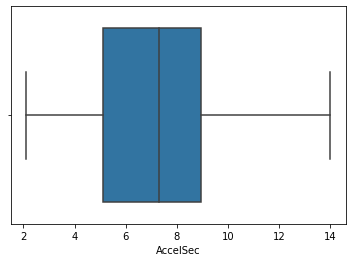

In [ ]:
sns.boxplot(x = Electric_cars['AccelSec'])

No outliers present in the AccelSec column, note this attribute means the number of seconds it takes for a car to get from 0 - 100km/h so the **lower**, the better.

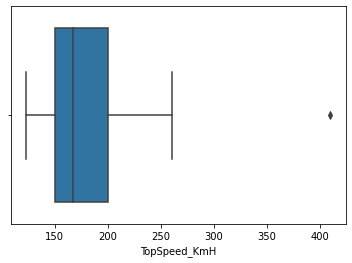

In [ ]:
sns.boxplot(x = Electric_cars['TopSpeed_KmH'])

TopSpeed_KmH has limited outliers

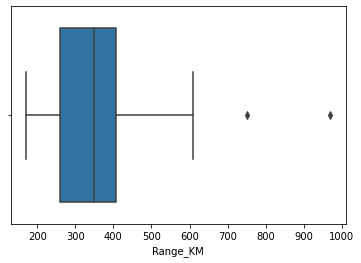

In [ ]:
sns.boxplot(x = Electric_cars['Range_KM'])

Range_KM has limited outliers

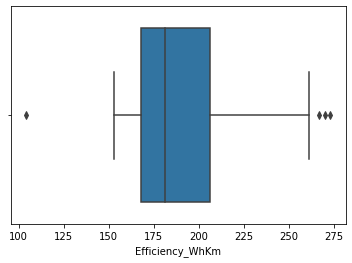

In [ ]:
sns.boxplot(x = Electric_cars['Efficiency_WhKm'])

Some outliers visually present in the Efficiency_WhKm column

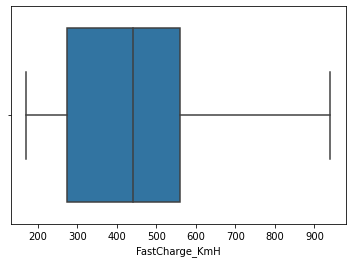

In [ ]:
sns.boxplot(x = Electric_cars['FastCharge_KmH'])

No outliers present in the FastCharge_KmH column

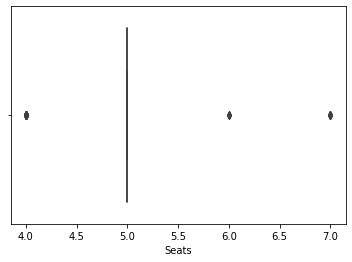

In [ ]:
sns.boxplot(x = Electric_cars['Seats'])

Seats is not that useful of an attribute to test outliers on given such small range (2 - 7)

In [ ]:
# Defining Quartiles for potential removal of outliers
Q1 = Electric_cars['Efficiency_WhKm'].quantile(0.25) 
Q3 = Electric_cars['Efficiency_WhKm'].quantile(0.75)
IQR = Q3 - Q1 # Inter-Quartile range will be used to calculate suspect outliers
total_outlier_num = ((Electric_cars['Efficiency_WhKm'] < (Q1 - 1.5 * IQR)) | (Electric_cars['Efficiency_WhKm'] > (Q3 + 1.5 * IQR))).sum()
total_outlier_num


4

Calculation reveals 4 outliers out of 98 observations for Efficiency_WhKm - very small

In [ ]:
Electric_cars[Electric_cars['Efficiency_WhKm'] == Electric_cars['Efficiency_WhKm'].max()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
84,Mercedes,EQV 300 Long,10.000,140,330,273,290,Yes,FWD,Type 2 CCS,SPV,N,7,70631


The car with the highest Efficiency_WhKm in the dataset is a N segment vehicle - this is a motor vehicle for carrying goods

In [ ]:
Electric_cars[Electric_cars['Efficiency_WhKm'] == Electric_cars['Efficiency_WhKm'].min()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
48,Lightyear,One,10.000,150,575,104,540,Yes,AWD,Type 2 CCS,Liftback,F,5,149000


The car with the lowest Efficiency_WhKm in the dataset is a F segment luxury vehicle. 

Given there are only a small number of outliers which don't appear to be outliers for other attributes, have decided to retain in dataset. These data points might also be useful for solving the business problem.

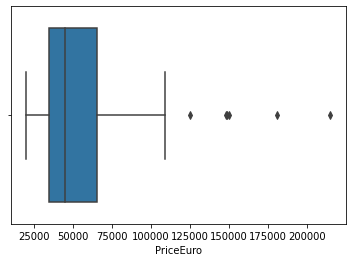

In [ ]:
sns.boxplot(x = Electric_cars['PriceEuro'])

In [ ]:
# Defining Quartiles for potential removal of outliers
Q1 = Electric_cars['PriceEuro'].quantile(0.25) 
Q3 = Electric_cars['PriceEuro'].quantile(0.75)
IQR = Q3 - Q1 # Inter-Quartile range will be used to calculate suspect outliers
total_outlier_PE = ((Electric_cars['PriceEuro'] < (Q1 - 1.5 * IQR)) | (Electric_cars['PriceEuro'] > (Q3 + 1.5 * IQR))).sum()
total_outlier_PE

6

Again, our dependent variable of focus PriceEuro only has a small number of outliers (6) - will retain these observations in the dataset. These extra data points could be used for solving the business problem.

In [ ]:
# Interest in the most expensive EV
Electric_cars [Electric_cars['PriceEuro'] == Electric_cars['PriceEuro'].max()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_KM,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.100,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000


Elon Musk is very proud of this car!

# Data Visualisation

A good place to start is understanding the visual distribution of the price of the electric cars.

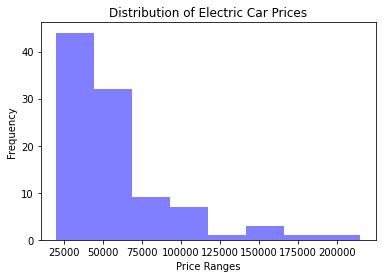

In [ ]:
# Matplotlib histogram is a useful way to understand the distribution of price data
_, ax = plt.subplots()
ax.hist(Electric_cars['PriceEuro'], bins = 8, alpha = 0.5, facecolor = "blue")
plt.xlabel("Price Ranges")
plt.ylabel("Frequency")
plt.title("Distribution of Electric Car Prices")
plt.show()

The vast majority of electric cars are retailing for below 75000 euros

The focus then moves to the categorical variables to determine whether there are any key patterns/trends. I have decided to omit Brand (given there are so many) and Model (each model is unique) from the visualisation analysis.

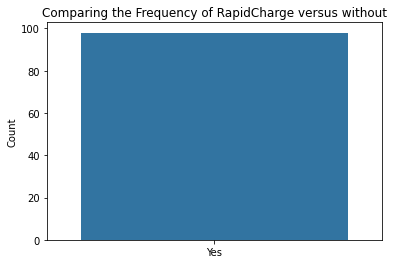

Value count for RapidCharge:
Yes    98
Name: RapidCharge, dtype: int64


In [ ]:
sns.barplot(x = Electric_cars['RapidCharge'].value_counts().index, 
            y = Electric_cars['RapidCharge'].value_counts().values)
plt.title ("Comparing the Frequency of RapidCharge versus without")
plt.ylabel ("Count")
plt.show()
print("Value count for RapidCharge:\n{}".format(Electric_cars['RapidCharge'].value_counts()))

Every single electric car in the dataset (apart from the 5 obs removed above) has RapidCharge which makes this attribute redundant 

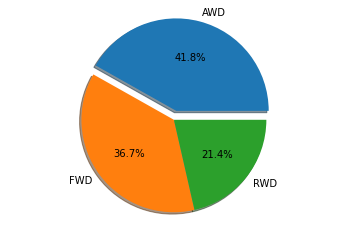

In [ ]:
# Using a pie chart to visualise PowerTrain
labels = ['AWD','FWD','RWD']

sizes = [Electric_cars['PowerTrain'].value_counts()[0],
         Electric_cars['PowerTrain'].value_counts()[1],
         Electric_cars['PowerTrain'].value_counts()[2],
        ]
explode=[0.1,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

AWD is the most popular powertrain type. Based on some understanding of cars, AWD/FWD are typically better than RWD because of greater traction. 

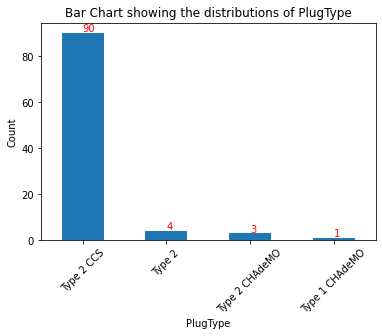

In [ ]:
# Using Matplotlib to plot a bar chart for visualising the different observations in attribute PlugType
Electric_cars['PlugType'].value_counts().plot(kind='bar')
# Add count over the top of bar
ax=Electric_cars['PlugType'].value_counts().plot.bar(width=.5)
for i, v in Electric_cars['PlugType'].value_counts().reset_index().iterrows():
    ax.text(i, v.PlugType + 0.5, v.PlugType, color='red')
    
plt.xticks(rotation=45) # Rotating xticks by 45 degrees
plt.xlabel('PlugType')
plt.ylabel('Count')
plt.title('Bar Chart showing the distributions of PlugType')
plt.show()

The vast majority of cars in the dataset have a plug type of Type 2 CCS - this attribute could be worth exploring further with respect to price

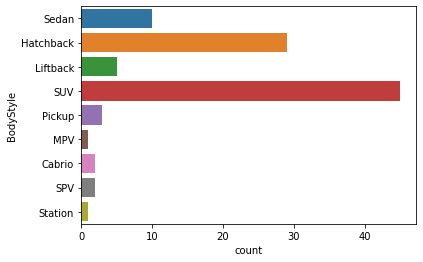

In [ ]:
#Plotting the attribute BodyStyle using seaborn on the y axis
p = sns.countplot(data=Electric_cars,
                  y = 'BodyStyle')

Hatchbacks and SUVs are especially prominent in the dataset

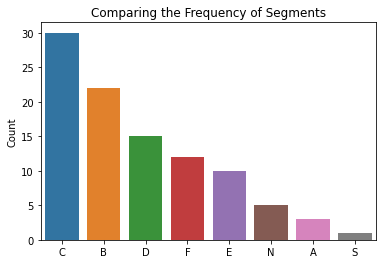

Value count for Segments:
C    30
B    22
D    15
F    12
E    10
N     5
A     3
S     1
Name: Segment, dtype: int64


In [ ]:
sns.barplot(x = Electric_cars['Segment'].value_counts().index, 
            y = Electric_cars['Segment'].value_counts().values)
plt.title ("Comparing the Frequency of Segments")
plt.ylabel ("Count")
plt.show()
print("Value count for Segments:\n{}".format(Electric_cars['Segment'].value_counts()))

While it seems obvious that electric cars of the F: luxury and S: sports type would yield higher prices, I chose to include the Segment attribute in analysis regardless. There might be an interesting finding pertaining to this attribute at the end of the notebook. 
We see here that about half the dataset is comprised of B: small and C: medium type cars. 

We move on to the numerical attributes, which can be automatically plugged into a correlation map with price. However, it is still useful for us to understand the distribution of data points in each attribute through the use of histograms and density plots.

123

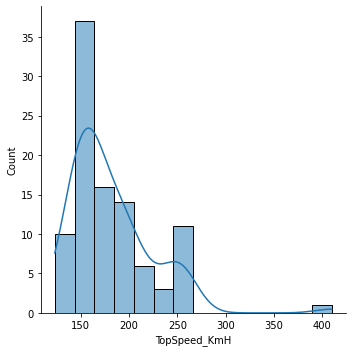

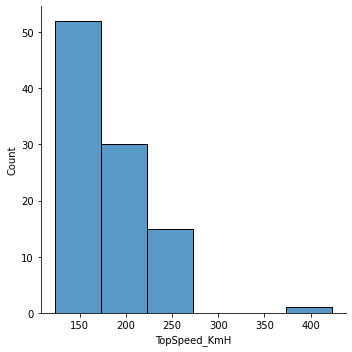

In [ ]:
sns.displot(Electric_cars, x=Electric_cars['TopSpeed_KmH'], kde=True) 
sns.displot(Electric_cars, x=Electric_cars['TopSpeed_KmH'], binwidth = 50, kind="hist")
np.min(Electric_cars['TopSpeed_KmH'])

The histograms (one with KDE curve) highlight that the majority of electric cars in the dataset have a Top Speed of between 125 - 175 KmH. AccelSec is likely heavily related to Top Speed so it won't be visualised.

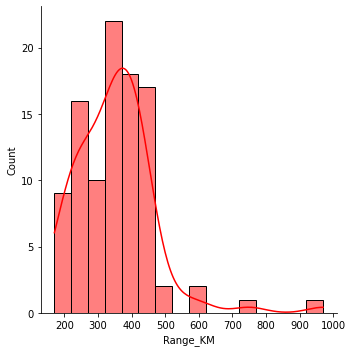

In [ ]:
# histogram with KDE curve together
sns.displot(Electric_cars['Range_KM'], kde = True, binwidth = 50, color = "red")

Strong variability shown in the density plot for Range_KM - the frequency is concentrated at the 300 - 350 & 350 - 400 Range_KM bins. After about 450km in range, the frequency of electric cars drops drastically.

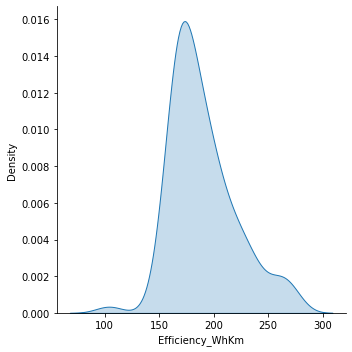

In [ ]:
sns.displot(Electric_cars, x=Electric_cars['Efficiency_WhKm'], kind="kde", fill=True)

Again fairly strong variability with Efficiency_WhKm. Vast majority of cars are concentrated within the Efficiency range of 150 - 200 WhKm

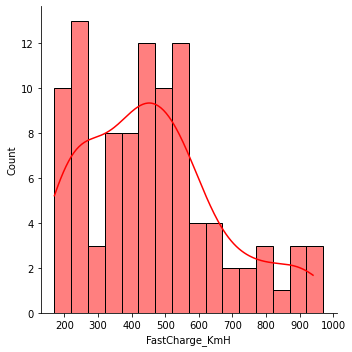

In [ ]:
sns.displot(Electric_cars['FastCharge_KmH'], kde = True, binwidth = 50, color = "red")

The FastCharge_KmH attribute (which measures how much range is added to the car after fast charging) has its data points more evenly distributed than the numeric attributes visualised above.

# Data Preparation - Categorical Attributes to Binary Values

In order to fit the categorical attributes into the regression analysis and test for statistical significance, I had to convert some key observations into binary values (i.e 1 and 0):
- PowerTrain = "AWD"--> 1, otherwise 0
- PlugType = "Type 2 CCS" --> 1, otherwise 0
- BodyStyle = "Hatchback" or "SUV" --> 1, otherwise 0
- Segment = "E" or "F" or "S" (Upper class segments) --> 1, otherwise 0

In [ ]:
ones = ['AWD']
zeros = ['FWD', 'RWD']
try:
    Electric_cars['PowerTrain'] = Electric_cars['PowerTrain'].isin(ones).astype("int64") # running the function more than once just converts the whole columns to 0s
except Exception as e:
    print("Something needs fixing: {}".format(e)) # try and except block in case something goes wrong
print(Electric_cars['PowerTrain'].head(30)) # printing to see if the code logic works

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    0
29    0
Name: PowerTrain, dtype: int64


In [ ]:
Electric_cars['PlugType'] = (Electric_cars['PlugType'] == "Type 2 CCS").astype("int64")

In [ ]:
Electric_cars['BodyStyle'] = (Electric_cars['BodyStyle'].isin(("Hatchback", "SUV"))).astype("int64")

In [ ]:
Electric_cars['Segment'] = Electric_cars['Segment'].isin(("E", "F", "S")).astype("int64")

In [ ]:
print(Electric_cars['Segment'].head(30)) # Checking the code logic

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
Name: Segment, dtype: int64


In [ ]:
Electric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_KM         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     int64  
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     int64  
 9   PlugType         98 non-null     int64  
 10  BodyStyle        98 non-null     int64  
 11  Segment          98 non-null     int64  
 12  Seats            98 non-null     int64  
 13  PriceEuro        98 non-null     int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 13.5+ KB


Key observations in the categorical attributes have now been converted to binary values and are ready for further analysis

# Correlation Heatmap

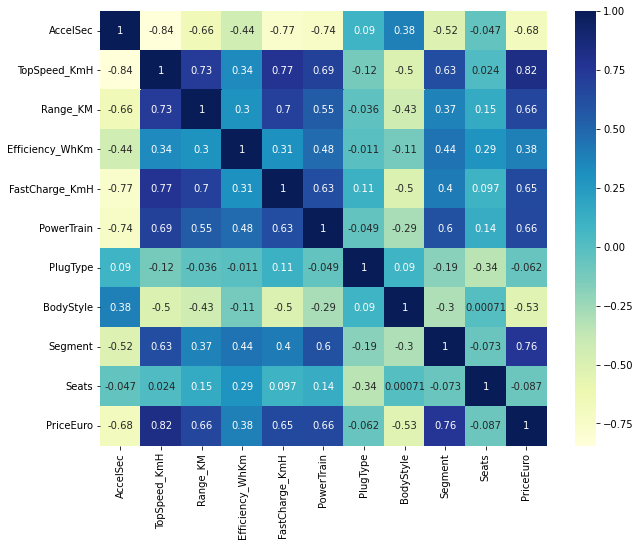

In [ ]:
# Organising attributes into a correlation heatmap
corr = Electric_cars.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap = 'YlGnBu')

This is a necessary step before conducting linear regression analysis to avoid the pitfalls of multicollinearity. As a general rule, an absolute correlation coefficient of > 0.7 (high correlation) among 2 or more predictors indicates the presence of multicollinearity.

The correlation map reveals some interesting information:
- Of all the variables - TopSpeed_KmH and upper class Segments (**E, F and S**) have the highest respective correlations with PriceEuro of 0.82 and 0.76 respectively
- TopSpeed_KmH has high correlation with Range_KM, FastCharge_KmH and high *negative* correlation with AccelSec
- Efficiency_WhKm has a correlation with PriceEuro of 0.38, and is not heavily correlated with the other attributes
- **AWD** PowerTrain has a correlation with PriceEuro of 0.66, and is not heavily correlated with the other attributes with the exception of TopSpeed_KmH (sitting at 0.69)
- **Hatchback** or **SUV** BodyStyle(s) has a negative correlation with PriceEuro of -0.53
- **Type 2 CCS** PlugType and **Seats** have a negligible correlation with PriceEuro

*TopSpeed_KmH*, *AccelSec*, *Range_KM* and *FastCharge_KmH* all have absolute correlation values of > |0.6| in relation to PriceEuro which indicates that they appear to be **strong contributory drivers** of price. The problem is these 4 attributes are are all highly correlated with each other and including all of them in the regression analysis will undermine their respective statistical significances as predictors. Thus, only *TopSpeed_KmH* and *Range_KM* have been chosen as inputs into the initial model, and the other attributes in another.

Alongside *TopSpeed_KmH* and *Range_KM*, the other inputs chosen include: *Efficiency_WhKm*, **AWD** *PowerTrain*, **Hatchback or SUV** *BodyStyles* and **E/F/S** *Segments*.





Text(0.5, 1.0, 'Scatter Plot - TopSpeed_KmH vs AccelSec')

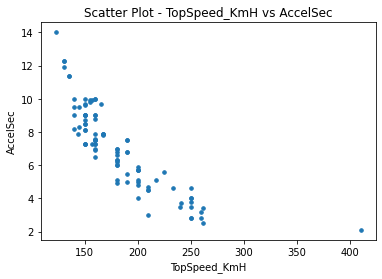

In [ ]:
# Scatter plot demonstrating high (negative) correlation
plt.scatter(Electric_cars['TopSpeed_KmH'], Electric_cars['AccelSec'], s = 50, marker='.')
plt.xlabel("TopSpeed_KmH")
plt.ylabel("AccelSec")
plt.title("Scatter Plot - TopSpeed_KmH vs AccelSec")

# Linear Regression Analysis: OLS

First we need to import all the necessary libraries for analysis and perhaps check some of the input columns.

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
%matplotlib inline

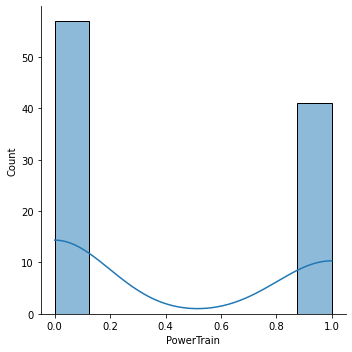

In [ ]:
sns.displot(Electric_cars, x=Electric_cars['PowerTrain'], kde=True) 

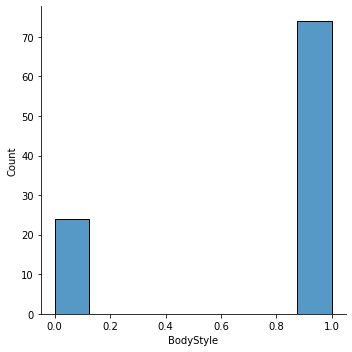

In [ ]:
sns.displot(Electric_cars, x=Electric_cars['BodyStyle'], kind = "hist") 

I decided to use the library statsmodels for a detailed summary of the multivariate linear regression. This regression model is based on Ordinary Least Squares (OLS).

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Putting all the input attributes into the x variable
x = Electric_cars[['TopSpeed_KmH', 'Range_KM', 'Efficiency_WhKm', 'PowerTrain', 'BodyStyle', 'Segment']]

# Putting the test data in the y variable/the dependent variable
y = Electric_cars['PriceEuro']
x, y = np.array(x), np.array(y)

In [ ]:
# Adding a constant to calculate the intercept, as this isn't provided by default
x = sm.add_constant(x)

In [ ]:
# creating a model and fitting it with the above attributes
model = sm.OLS(y, x)
results = model.fit()

In [ ]:
print(results.summary(xname = ['Intercept', 'TopSpeed_KmH', 'Range_KM', 'Efficiency_WhKm', 'PowerTrain', 'BodyStyle', 'Segment']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     65.19
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           8.27e-31
Time:                        06:16:47   Log-Likelihood:                -1080.2
No. Observations:                  98   AIC:                             2174.
Df Residuals:                      91   BIC:                             2193.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7461.0789   1.58e+04     

Elements which instantly stand out the most to me from my interpretation of the OLS Regression:
- The R-squared is 0.811, which is a measure of how much *PriceEuro* is explained by changes in the attributes. In percentage terms, 0.811 would mean our model explains 81.1% of the change in the *PriceEuro* variable - a high figure.
- P>|t| measures the p-value - a lower p-value indicates that the attribute is likely not to be in the model by chance i.e statistically significant. Using a confidence interval of 0.95 (95%) and a p-value threshold of 0.05, I can see that neither *Efficiency_WhKM* nor **AWD** *PowerTrain* is statistically significant. The Intercept's p-value suggests I can't really trust it either. 

I have decided to remove *Efficiency_WhKm* and **AWD** *PowerTrain* attributes to see whether this has any effect on the model:

In [ ]:
# Repeating the above but without these 2 attributes
x1 = Electric_cars[['TopSpeed_KmH', 'Range_KM', 'BodyStyle', 'Segment']]

y1 = Electric_cars['PriceEuro']
x1, y1 = np.array(x1), np.array(y1)

x1 = sm.add_constant(x1)

model1 = sm.OLS(y1, x1)
results1 = model1.fit()

print(results1.summary(xname = ['Intercept', 'TopSpeed_KmH', 'Range_KM', 'BodyStyle', 'Segment']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     99.53
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           9.58e-33
Time:                        06:16:59   Log-Likelihood:                -1080.4
No. Observations:                  98   AIC:                             2171.
Df Residuals:                      93   BIC:                             2184.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9599.9992   1.05e+04     -0.913   

Now you can see that even with the removal of those 2 attributes, the R-squared figure of 0.811 remains exactly the same.
All attributes (with the exception of the Intercept) are statistically significant using a confidence interval of 0.95.
*Segment*, *TopSpeed_KmH* and *Range_KM* are significant positive contributors towards the price of an electric car. A **Hatchback** or **SUV** *BodyStyle* appears to be a negative contributory factor towards the price. 

The coefficient of 267.0363 for TopSpeed_KmH (as an example) can be interpreted as: 1 KmH change in the Top Speed is predicted to lead to a 267.0363 change in the Price, before the other attributes/Intercept is taken into account. It is the m in the linear regression formula '**y = mx + b**', where y is the Price and b is the Intercept.


In [ ]:
# Repeating the above but swapping TopSpeed_KmH and Range_KM for AccelSec and FastCharge_KmH
x2 = Electric_cars[['AccelSec', 'FastCharge_KmH', 'BodyStyle', 'Segment']]

y2 = Electric_cars['PriceEuro']
x2, y2 = np.array(x2), np.array(y2)

x2 = sm.add_constant(x2)

model2 = sm.OLS(y2, x2)
results2 = model2.fit()

print(results2.summary(xname = ['Intercept', 'AccelSec', 'FastCharge_KmH', 'BodyStyle', 'Segment']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     73.58
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           5.62e-28
Time:                        06:17:16   Log-Likelihood:                -1092.0
No. Observations:                  98   AIC:                             2194.
Df Residuals:                      93   BIC:                             2207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.208e+04   1.52e+04      4.

Swapping TopSpeed_KmH and Range_KM for the other 2 highly correlated attributes AccelSec and FastCharge_KmH yields a similarly high R-squared figure of 0.760.
All attributes displayed, even the Intercept, are statistically significant using a confidence interval of 0.95.
*FastCharge_KmH* is a positive contributor towards the price of an electric car. *AccelSec* is a negative contributor towards the price as the higher the value, the slower the acceleration of the vehicle.

# Linear Regression Analysis: Train and Test

For the purposes of the last section, I organise Train and Test dataset splits for our model 1 OLS Regression - which had the high R^2 of 0.811, but all of its coefficients and the intercept were statistically significant. 

*Train Dataset* : A set of examples used to fit parameters of a model

**Test Dataset** : A dataset used to evaluate the final model fit on the training dataset

In [ ]:
# Importing the library for splitting the data into train and test sets
import numpy as np 
from sklearn.model_selection import train_test_split

In [ ]:
# Putting input attributes into the x variable
x_traintest = Electric_cars[['TopSpeed_KmH', 'Range_KM', 'BodyStyle', 'Segment']]

# Putting the test data in the y variable/the dependent variable
y_traintest = Electric_cars['PriceEuro']

In [ ]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_traintest, y_traintest, test_size=0.3333333, random_state=42)

In [ ]:
# Training the train data on test data, and then predicting the test values
lr = LinearRegression() # Linear Regression is treated as an object
lr.fit(x_train, y_train) 
predictions = lr.predict(x_test) 
predictions

array([ 89081.12839071, 124368.53532411,  89398.79659255,  26214.08915573,
        30879.49056359,  81517.23817883, 117846.93551508,  90168.06169221,
        47049.5613902 ,  78012.07335803,  43810.56614389,  44875.69478719,
       113499.20230906,  40617.24737848,  21910.99884837,  23836.74555314,
        36269.51417246,  45984.4327469 ,  39892.62517748,  31038.32466452,
        37038.77927212, 114948.44671107,  31921.78096644,  47138.84718751,
        50583.3865979 ,  94020.20933696,  49223.42799321,  46145.33326084,
        27210.70307767,  31765.01327855,  39168.00297647,  80430.30487733,
        29792.55726209])

In [ ]:
# Checking the y-test values
y_test 

63     75351
40     79990
99     96050
18     30000
85     34900
87     69551
65    109302
42     81639
10     69484
0      55480
31     38105
78     54000
47    102945
26     33000
44     20129
4      32997
22     35000
12     40795
95     35575
75     34400
49     36057
72    150000
70     41526
15     40936
39     45000
33     75000
9      55000
84     70631
11     29234
66     33246
98     45000
30     67358
28     38017
Name: PriceEuro, dtype: int64

Text(0.5, 1.0, 'y_test vs predictions (x_test) scatterplot')

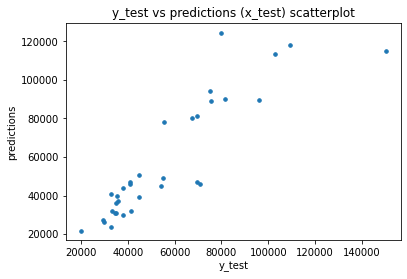

In [ ]:
# Drawing the Scatter plot for y_test data and predictions to see the accuracy.
plt.scatter(y_test, predictions, s = 50, marker='.')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("y_test vs predictions (x_test) scatterplot")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


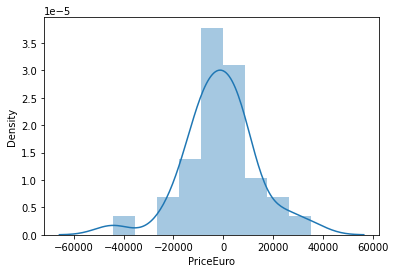

In [ ]:
# Distribution plot for showing the error rate
sns.distplot(y_test-predictions) 

In [ ]:
# Metrics help in determining the error rate between y_test and predictions
from sklearn import metrics 

In [ ]:
print("MAE", metrics.mean_absolute_error(y_test,predictions))  # Mean Absolute error
print("MSE", metrics.mean_squared_error(y_test,predictions)) # Mean Square error
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions))) # Root Mean Square error

MAE 10363.458129519844
MSE 200861338.3695502
RMSE 14172.555816420347


Although the model isn't perfect, on average it has been able to predict data points reasonably close to the actual test figures. It could be improved with a substantially greater sample size.